In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
from tqdm import tqdm
import xgboost as xgb
import tensorflow as tf
from keras.applications.resnet50 import ResNet50
# from keras.applications.resnet18 import ResNet18
from keras.models import Model
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import Flatten, Input
import scipy
from sklearn.metrics import fbeta_score
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import keras
from tqdm import tqdm
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
from keras.models import Model,Sequential,  load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
#from keras.optimizers import adam_v2

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.applications.vgg16 import VGG16

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
import pandas as pd
import numpy as np
import os
import sys
from shutil import copyfile
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator
imagegen = ImageDataGenerator()


In [6]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load train data from drive
disease_types = [
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
    'Grape___healthy', 'Grape___Leaf_blight', 'Grape___Esca', 'Grape___Black_rot',
    'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight'
]

imagegen = ImageDataGenerator()
train_generator = imagegen.flow_from_directory(
    '/content/drive/MyDrive/BitkiHastaligiTeshisi - OzgeOzaras/Mini_SqueezeNet_New/Kodlar/dataset',
    shuffle=False,
    batch_size=64,
    target_size=(224, 224),
    seed=42
)

# Initialize empty lists to store data
x = []
y = []

# Iterate through the generator
for _ in range(train_generator.samples // train_generator.batch_size):
    batch_x, batch_y = next(train_generator)  # Get the next batch
    x.append(batch_x)
    y.append(batch_y)

# Concatenate all batches into a single array
x = np.concatenate(x)
y = np.concatenate(y)

print(x.shape)
print(y.shape)

Found 9385 images belonging to 11 classes.
(9344, 224, 224, 3)
(9344, 11)


In [7]:
#Converting  our color images to a vector
x=x.reshape(9344,224*224*3)

In [8]:
x.shape

(9344, 150528)

In [9]:
#Apply SMOTE method
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_smote, y_smote = sm.fit_resample(x, y)

In [10]:
X_smote.shape

(18095, 150528)

In [11]:
X_smote=X_smote.reshape(18095,224,224,3)

In [12]:
print(f'''Shape of X before SMOTE: {x.shape}
Shape of X after SMOTE: {X_smote.shape}''')



Shape of X before SMOTE: (9344, 150528)
Shape of X after SMOTE: (18095, 224, 224, 3)


In [13]:
IMAGE_SIZE = 224
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath)) # Loading a color image is the default flag
# Resize image to target size
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)


In [14]:
# Normalize the data
X_smote = X_smote / 255.
print('Train Shape: {}'.format(X_smote.shape))


Train Shape: (18095, 224, 224, 3)


In [15]:
X_train, X_val, Y_train, Y_val = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [16]:
EPOCHS = 50
BATCH_SIZE=64
SIZE=224
N_ch=3

In [17]:
from keras.applications import ResNet50
def build_resnet50():
    resnet = ResNet50(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)
    x = resnet(x)
    x = Flatten(name="flatten")(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    # multi output
    output = Dense(11,activation = 'softmax', name='root')(x)
    # model
    model = Model(input,output)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()

    return model

In [18]:
model_ResNet50 = build_resnet50()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 3)         │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ root (Dense)                         │ (None, 11)                  │           2,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,282,015 (188.00 MB)

 Trainable params: 49,228,383 (187.79 MB)

 Non-trainable params: 53,632 (209.50 KB)

In [19]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Update filepath to use .keras extension
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# You can now fit your model and include these callbacks
# Example:
# model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, callbacks=[es, mc])


In [20]:
hist=model_ResNet50.fit(X_train, Y_train,
               batch_size=BATCH_SIZE,
               epochs=EPOCHS,
               verbose=1,
               validation_data=(X_val, Y_val),
               callbacks=[es,mc])

Epoch 1/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.8318 - loss: 0.5706
Epoch 1: val_accuracy improved from -inf to 0.09699, saving model to best_model.keras
227/227 ━━━━━━━━━━━━━━━━━━━━ 122s 267ms/step - accuracy: 0.8323 - loss: 0.5690 - val_accuracy: 0.0970 - val_loss: 5.4727
Epoch 2/50
226/227 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9968 - loss: 0.0135
Epoch 2: val_accuracy did not improve from 0.09699
227/227 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - accuracy: 0.9968 - loss: 0.0135 - val_accuracy: 0.0970 - val_loss: 4.9957
Epoch 3/50
226/227 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9977 - loss: 0.0089
Epoch 3: val_accuracy improved from 0.09699 to 0.10473, saving model to best_model.keras
227/227 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - accuracy: 0.9977 - loss: 0.0089 - val_accuracy: 0.1047 - val_loss: 5.3749
Epoch 4/50
226/227 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9970 - loss: 0.0082
Epoch 4: val_accuracy improved from 0.10473 to 0.42664, saving mo

In [21]:
from tensorflow.keras.models import load_model

# Load the saved model using the correct file extension
saved_model = load_model('best_model.keras')

In [22]:
y_pred = saved_model.predict(X_val)

114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step


In [23]:
y_pred=np.argmax(y_pred, axis=1)

In [24]:
Y_val=np.argmax(Y_val, axis=1)

In [25]:
print("Doğruluk: ",accuracy_score(Y_val, y_pred))
print("F1_Skor: ", f1_score(Y_val, y_pred,average="macro"))
print("Hassasiyet: ",precision_score(Y_val, y_pred,average="macro"))
print("Duyarlılık: ", recall_score(Y_val, y_pred,average="macro"))

Doğruluk:  0.9997236805747444
F1_Skor:  0.9997223217883494
Hassasiyet:  0.9997278170930866
Duyarlılık:  0.9997176736307171


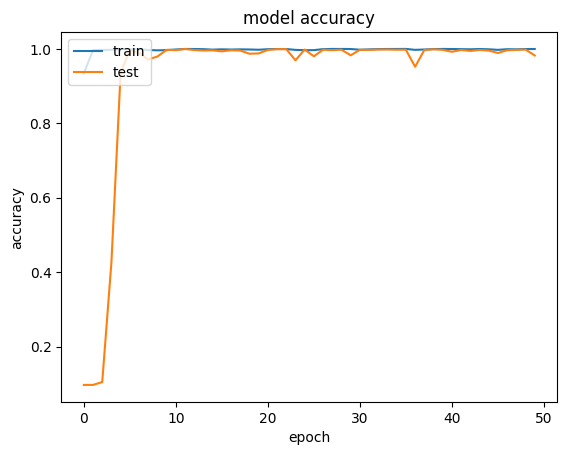

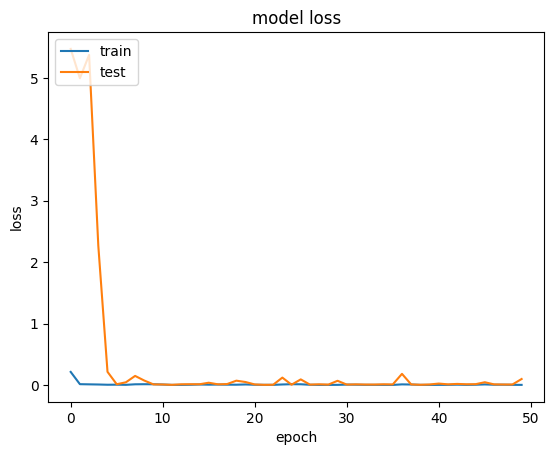

In [26]:

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[351   0   0   0   0   0   0   0   0   0   0]
 [  0 315   0   0   0   0   0   0   0   0   0]
 [  0   0 339   0   0   0   0   0   0   0   0]
 [  0   0   0 330   0   0   0   0   0   0   0]
 [  0   0   0   0 321   1   0   0   0   0   0]
 [  0   0   0   0   0 333   0   0   0   0   0]
 [  0   0   0   0   0   0 328   0   0   0   0]
 [  0   0   0   0   0   0   0 301   0   0   0]
 [  0   0   0   0   0   0   0   0 345   0   0]
 [  0   0   0   0   0   0   0   0   0 326   0]
 [  0   0   0   0   0   0   0   0   0   0 329]]


<Axes: >

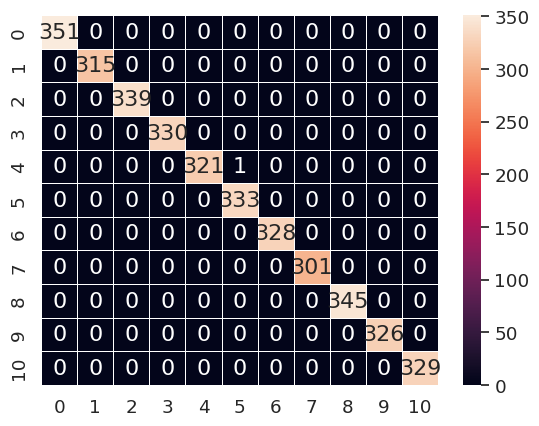

In [27]:
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_val, y_pred)
print(cm)
sn.set(font_scale=1.2)#for label size
sn.heatmap(cm, annot=True,fmt="d", linewidths=.5 ,annot_kws={"size": 16})# font size

##  MobilNetV2

In [16]:
EPOCHS = 100
BATCH_SIZE=64
SIZE=224
N_ch=3

In [44]:
from keras.applications import MobileNetV2
def build_MobilNetV2():
    mobilnetv2 = MobileNetV2(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)
    x = mobilnetv2(x)
    x = Flatten(name="flatten")(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    # multi output
    output = Dense(11,activation = 'softmax', name='root')(x)
    # model
    model = Model(input,output)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()

    return model

In [45]:
model_mobilnet=build_MobilNetV2()

<ipython-input-44-319af5b0896c>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilnetv2 = MobileNetV2(weights='imagenet', include_top=False)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 224, 224, 3)         │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      16,056,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ root (Dense)                         │ (None, 11)                  │           2,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,318,495 (69.88 MB)

 Trainable params: 18,283,871 (69.75 MB)

 Non-trainable params: 34,624 (135.25 KB)

In [46]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Update filepath to use .keras extension
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# You can now fit your model and include these callbacks
# Example:
# model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, callbacks=[es, mc])


In [47]:
hist=model_mobilnet.fit(X_train, Y_train,
               batch_size=BATCH_SIZE,
               epochs=EPOCHS,
               verbose=1,
               validation_data=(X_val, Y_val),
               callbacks=[es,mc])

Epoch 1/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.7556 - loss: 0.8250
Epoch 1: val_accuracy improved from -inf to 0.61426, saving model to best_model.keras
227/227 ━━━━━━━━━━━━━━━━━━━━ 79s 173ms/step - accuracy: 0.7562 - loss: 0.8229 - val_accuracy: 0.6143 - val_loss: 1.2646
Epoch 2/100
226/227 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9895 - loss: 0.0355
Epoch 2: val_accuracy did not improve from 0.61426
227/227 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - accuracy: 0.9895 - loss: 0.0355 - val_accuracy: 0.4913 - val_loss: 1.8130
Epoch 3/100
226/227 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9956 - loss: 0.0133
Epoch 3: val_accuracy did not improve from 0.61426
227/227 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - accuracy: 0.9956 - loss: 0.0133 - val_accuracy: 0.4918 - val_loss: 1.7280
Epoch 4/100
226/227 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9980 - loss: 0.0085
Epoch 4: val_accuracy did not improve from 0.61426
227/227 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - accur

In [48]:
from tensorflow.keras.models import load_model

# Load the saved model using the correct file extension
saved_model = load_model('best_model.keras')

In [49]:
y_pred = saved_model.predict(X_val)

114/114 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step


In [50]:
y_pred=np.argmax(y_pred, axis=1)

In [51]:
Y_val=np.argmax(Y_val, axis=1)

In [52]:
print("Doğruluk: ",accuracy_score(Y_val, y_pred))
print("F1_Skor: ", f1_score(Y_val, y_pred,average="macro"))
print("Hassasiyet: ",precision_score(Y_val, y_pred,average="macro"))
print("Duyarlılık: ", recall_score(Y_val, y_pred,average="macro"))

Doğruluk:  0.9997236805747444
F1_Skor:  0.9997287930624377
Hassasiyet:  0.9997372569626904
Duyarlılık:  0.9997211377579476


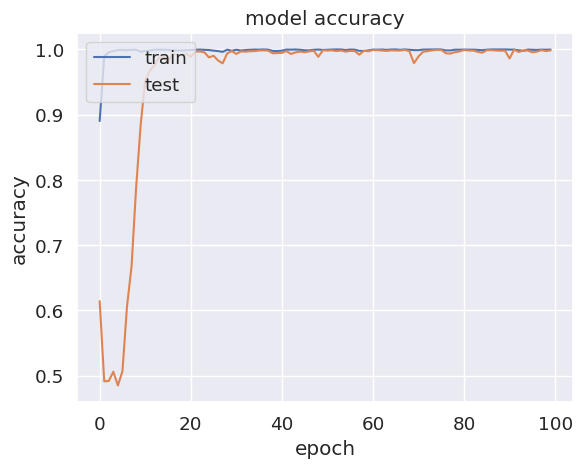

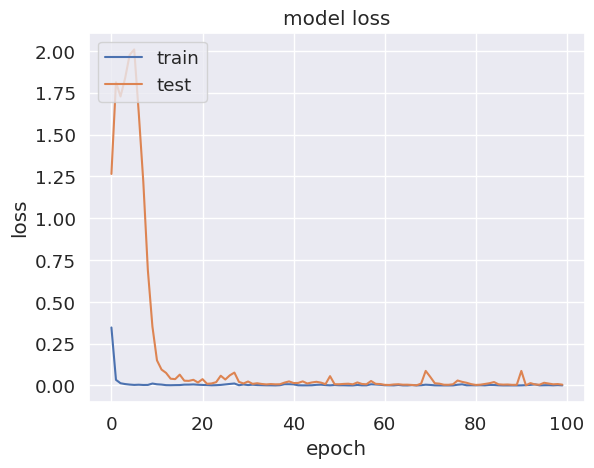

In [53]:

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[351   0   0   0   0   0   0   0   0   0   0]
 [  0 315   0   0   0   0   0   0   0   0   0]
 [  0   0 339   0   0   0   0   0   0   0   0]
 [  0   0   0 330   0   0   0   0   0   0   0]
 [  0   0   0   0 322   0   0   0   0   0   0]
 [  0   0   0   0   0 333   0   0   0   0   0]
 [  0   0   0   0   0   0 328   0   0   0   0]
 [  0   0   0   0   0   0   0 301   0   0   0]
 [  0   0   0   0   0   0   0   0 345   0   0]
 [  0   0   0   0   0   0   0   0   1 325   0]
 [  0   0   0   0   0   0   0   0   0   0 329]]


<Axes: >

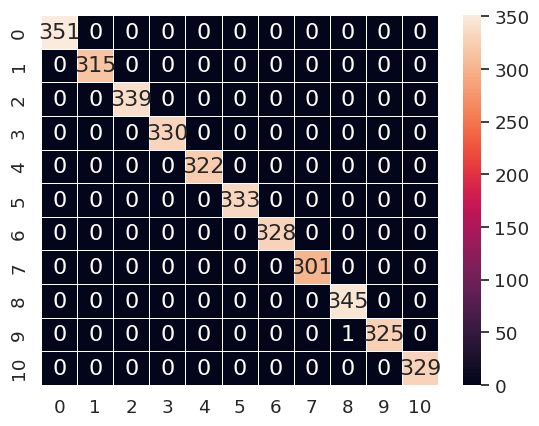

In [54]:
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_val, y_pred)
print(cm)
sn.set(font_scale=1.2)#for label size
sn.heatmap(cm, annot=True,fmt="d", linewidths=.5 ,annot_kws={"size": 16})# font size

## DenseNet121

In [17]:
from keras.applications.densenet import DenseNet121
def build_densenet():
    densenet = DenseNet121(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)
    x = densenet(x)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # multi output
    output = Dense(11,activation = 'softmax', name='root')(x)

    # model
    model = Model(input,output)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()

    return model

In [18]:
model_dense = build_densenet()

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 3)         │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ (None, 7, 7, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ root (Dense)                         │ (None, 11)                  │           2,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,307,935 (27.88 MB)

 Trainable params: 7,221,727 (27.55 MB)

 Non-trainable params: 86,208 (336.75 KB)

In [19]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Update filepath to use .keras extension
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# You can now fit your model and include these callbacks
# Example:
# model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, callbacks=[es, mc])


In [20]:
hist= model_dense.fit(X_train, Y_train,
               batch_size=BATCH_SIZE,
               epochs=EPOCHS,
               verbose=1,
               validation_data=(X_val, Y_val),
               callbacks=[es,mc])

Epoch 1/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 551ms/step - accuracy: 0.6467 - loss: 1.2507
Epoch 1: val_accuracy improved from -inf to 0.91268, saving model to best_model.keras
227/227 ━━━━━━━━━━━━━━━━━━━━ 319s 659ms/step - accuracy: 0.6475 - loss: 1.2476 - val_accuracy: 0.9127 - val_loss: 0.3021
Epoch 2/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9804 - loss: 0.0737
Epoch 2: val_accuracy improved from 0.91268 to 0.99337, saving model to best_model.keras
227/227 ━━━━━━━━━━━━━━━━━━━━ 28s 125ms/step - accuracy: 0.9804 - loss: 0.0736 - val_accuracy: 0.9934 - val_loss: 0.0210
Epoch 3/100
226/227 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9911 - loss: 0.0314
Epoch 3: val_accuracy improved from 0.99337 to 0.99724, saving model to best_model.keras
227/227 ━━━━━━━━━━━━━━━━━━━━ 28s 124ms/step - accuracy: 0.9911 - loss: 0.0314 - val_accuracy: 0.9972 - val_loss: 0.0087
Epoch 4/100
226/227 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9972 - loss: 0.0142
Epoch 4: val_accura

KeyboardInterrupt: 

In [21]:
from tensorflow.keras.models import load_model

# Load the saved model using the correct file extension
saved_model = load_model('best_model.keras')

In [22]:
y_pred = saved_model.predict(X_val)

114/114 ━━━━━━━━━━━━━━━━━━━━ 25s 113ms/step


In [23]:
y_pred=np.argmax(y_pred, axis=1)

In [24]:
Y_val=np.argmax(Y_val, axis=1)

In [25]:
print("Doğruluk: ",accuracy_score(Y_val, y_pred))
print("F1_Skor: ", f1_score(Y_val, y_pred,average="macro"))
print("Hassasiyet: ",precision_score(Y_val, y_pred,average="macro"))
print("Duyarlılık: ", recall_score(Y_val, y_pred,average="macro"))

Doğruluk:  1.0
F1_Skor:  1.0
Hassasiyet:  1.0
Duyarlılık:  1.0


In [26]:

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'hist' is not defined

[[351   0   0   0   0   0   0   0   0   0   0]
 [  0 315   0   0   0   0   0   0   0   0   0]
 [  0   0 339   0   0   0   0   0   0   0   0]
 [  0   0   0 330   0   0   0   0   0   0   0]
 [  0   0   0   0 322   0   0   0   0   0   0]
 [  0   0   0   0   0 333   0   0   0   0   0]
 [  0   0   0   0   0   0 328   0   0   0   0]
 [  0   0   0   0   0   0   0 301   0   0   0]
 [  0   0   0   0   0   0   0   0 345   0   0]
 [  0   0   0   0   0   0   0   0   0 326   0]
 [  0   0   0   0   0   0   0   0   0   0 329]]


<Axes: >

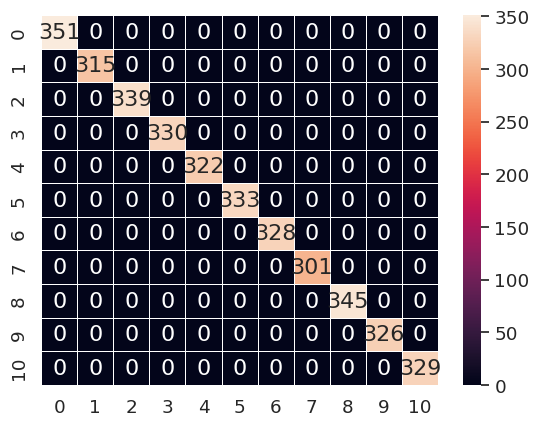

In [27]:
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_val, y_pred)
print(cm)
sn.set(font_scale=1.2)#for label size
sn.heatmap(cm, annot=True,fmt="d", linewidths=.5 ,annot_kws={"size": 16})# font size